In [11]:
from IPython.core.display import display, HTML; display(HTML("<style>.container { width:99% !important; }</style>"))

##  Exploratory Data Analyis, Pokemon Stats: Overview

 **Authored by Aseem Sachdeva**

 **Exploratory Data Analysis: Pokemon(Gen. 1-7) - Background**

The dataset utilizd throughout this notebook was obtained through Kaggle.com, which regularly allows users to publish high quality datsets that are entirely prepped for public consumption. For this simple analysis, I was interested in conducting a preliminary dive into data garnered from the popular video game series Pokemon by answering two simple, yet important questions:
- What are the top 10 most powerful pokemon, based on a summation of all stats and regardless of generation?
- What are the specific strengths of this select group?/who are the top performers?
- What generation do they come from?

For the purpose of this analysis, legendary pokemon were disregarded to get rid of unusually high performing outliers that aren't representative of most pokemon.


 **Exploratory Data Analysis: Pokemon(Gen. 1-7) - Visualization Technique**

The visualization medium utilized for this assignment is the barchart. While it would have been theoreically possible to use other visualizations, such as scatterplots or pie charts, to convey the same information, barcharts provided the most human readable way to convey the data, and also left the least room for potential misinterpretation. It is worth noting that, because the x variables(categories) used in this analysis are non-numerical(i.e. name of pokemon), a histogram would have been a less appropriate method of conveyence. Conversely, if the data under consideration had been grouped in some sort of continuous numerical range(i.e. age of the pokemon), and we were interested in visualizing the frequency of each category, a histogram would have been more appropriate.

**Exploratory Data Analysis: Pokemon(Gen. 1-7) - Visualization Library**

The visualization toolkit utilized for this assignment is seaborn. seaborn is an open source python data visualization library bulilt on top of matplotlib, and is generally more visually dynamic that its counterpart. There are no specific installation requirements/dependencies needed to use seaborn, so the library and all its functionalities can easily be imported in a single statement within your computing environment(**import seaborn**). Because seaborn provides unique color palettes to highlight differences in data, specialized support for visualizing categorical data, and intuitive ways to create more complex, multi-plot grids, I believed that it would be an appropriate toolkit to use. 

## Demonstration

First, let's import the necessary libraries to aid us in our exploratory data analysis efforts. As an intial step, let's read in the pokemon dataset(taken from https://www.kaggle.com/rounakbanik/pokemon) and create the 'Total Stats' column ourselves, since it does not already exist within the dataset. We'll define total stats as a summation of hp, speed, attack, defense, special attack, and special defense. For the purpose of this analysis, we'll use the value found in the  'Total Stats' column as the primary metric for determining which pokemon is the most objectively powerful.

In [12]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
pd.set_option("display.max_columns", 999)
import seaborn as sns
pokemondf = pd.read_csv('pokemon.csv')
pokemondf['Total Stats'] = pokemondf['hp'] + pokemondf['attack'] + pokemondf['defense'] + pokemondf['sp_attack'] + pokemondf['sp_defense'] + pokemondf['speed']
pokemondf.head(1) #Let's view all the fields

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,Total Stats
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,Fushigidaneフシギダネ,Bulbasaur,88.1,1,65,65,45,grass,poison,6.9,1,0,318


Before visualizing our data, let's conduct a few priliminary steps to cleanse our data and remove any irregularities.

**Data Cleansing Step 1: Check that data types are accurate**

In [13]:
pokemondf.dtypes #The data types for each field appear to accurately reflect their descriptors

abilities             object
against_bug          float64
against_dark         float64
against_dragon       float64
against_electric     float64
against_fairy        float64
against_fight        float64
against_fire         float64
against_flying       float64
against_ghost        float64
against_grass        float64
against_ground       float64
against_ice          float64
against_normal       float64
against_poison       float64
against_psychic      float64
against_rock         float64
against_steel        float64
against_water        float64
attack                 int64
base_egg_steps         int64
base_happiness         int64
base_total             int64
capture_rate          object
classfication         object
defense                int64
experience_growth      int64
height_m             float64
hp                     int64
japanese_name         object
name                  object
percentage_male      float64
pokedex_number         int64
sp_attack              int64
sp_defense    

**Data Cleansing Step 2: Check the data for any null values**

In [14]:
pokemondf.isnull().sum() #One can see that several fields contain null values. Though not all are important, we'll fill them in with 'None' anyhow.

abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m              20
hp                     0
japanese_name          0
name                   0
percentage_male       98
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weight_kg             20
generation             0


In [15]:
pokemondf.fillna(value = 'None', inplace=True)

**Data Cleansing Step 3: Create Dataframe of 'Most Powerful' Pokemon**

In [16]:
#We'll exclude legendary pokemon so there are no extreme outliers
powerful_pokemon = pokemondf[pokemondf['is_legendary']!= True].sort_values('Total Stats',ascending = False) 
powerful_pokemon.head(10) #Let's view a few rows

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,Total Stats
372,"['Intimidate', 'Moxie']",0.50,1.0,2.0,1.0,2.0,0.5,0.5,1.00,1.0,0.25,0.0,4.0,1.00,1.0,1.00,2.0,1.0,0.5,145,10240,35,700,45,Dragon Pokémon,130,1250000,1.5,95,Bohmanderボーマンダ,Salamence,50,373,120,90,120,dragon,flying,102.6,3,0,700
375,"['Clear Body', 'Light Metal']",1.00,2.0,0.5,1.0,0.5,1.0,2.0,0.50,2.0,0.50,2.0,0.5,0.50,0.0,0.25,0.5,0.5,1.0,145,10240,35,700,3,Iron Leg Pokémon,150,1250000,1.6,80,Metagrossメタグロス,Metagross,None,376,105,110,110,steel,psychic,550,3,0,700
444,"['Sand Veil', 'Rough Skin']",1.00,1.0,2.0,0.0,2.0,1.0,0.5,1.00,1.0,1.00,1.0,4.0,1.00,0.5,1.00,0.5,1.0,1.0,170,10240,70,700,45,Mach Pokémon,115,1250000,1.9,108,Gaburiasガブリアス,Garchomp,50,445,120,95,92,dragon,ground,95,4,0,700
247,"['Sand Stream', 'Unnerve']",2.00,0.5,1.0,1.0,2.0,4.0,0.5,0.50,0.5,2.00,2.0,1.0,0.50,0.5,0.00,1.0,2.0,2.0,164,10240,35,700,45,Armor Pokémon,150,1250000,2,100,Bangirasバンギラス,Tyranitar,50,248,95,120,71,rock,dark,202,2,0,700
288,['Truant'],1.00,1.0,1.0,1.0,1.0,2.0,1.0,1.00,0.0,1.00,1.0,1.0,1.00,1.0,1.00,1.0,1.0,1.0,160,3840,70,670,45,Lazy Pokémon,100,1250000,2,150,Kekkingケッキング,Slaking,50,289,95,65,100,normal,None,130.5,3,0,670
129,"['Intimidate', 'Moxie']",0.50,1.0,1.0,4.0,1.0,0.5,0.5,1.00,1.0,1.00,0.0,1.0,1.00,1.0,1.00,2.0,0.5,0.5,155,1280,70,640,45,Atrocious Pokémon,109,1250000,6.5,95,Gyaradosギャラドス,Gyarados,50,130,70,130,81,water,flying,235,1,0,640
657,"['Torrent', 'Protean', 'Battle Bond']",2.00,0.5,1.0,2.0,2.0,2.0,0.5,1.00,0.5,2.00,1.0,0.5,1.00,1.0,0.00,1.0,0.5,0.5,145,5120,70,640,45,Ninja Pokémon,67,1059860,1.5,72,Gekkougaゲッコウガ,Greninja,88.1,658,153,71,132,water,dark,40,6,0,640
259,"['Torrent', 'Damp']",1.00,1.0,1.0,0.0,1.0,1.0,0.5,1.00,1.0,4.00,1.0,1.0,1.00,0.5,1.00,0.5,0.5,1.0,150,5120,70,635,45,Mud Fish Pokémon,110,1059860,1.5,100,Laglargeラグラージ,Swampert,88.1,260,95,110,70,water,ground,81.9,3,0,635
5,"['Blaze', 'Solar Power']",0.25,1.0,1.0,2.0,0.5,0.5,0.5,1.00,1.0,0.25,0.0,1.0,1.00,1.0,1.00,4.0,0.5,2.0,104,5120,70,634,45,Flame Pokémon,78,1059860,1.7,78,Lizardonリザードン,Charizard,88.1,6,159,115,100,fire,flying,90.5,1,0,634
305,"['Sturdy', 'Rock Head', 'Heavy Metal']",0.50,1.0,0.5,1.0,0.5,4.0,1.0,0.25,1.0,1.00,4.0,0.5,0.25,0.0,0.50,0.5,1.0,2.0,140,8960,35,630,45,Iron Armor Pokémon,230,1250000,2.1,70,Bossgodoraボスゴドラ,Aggron,50,306,60,80,50,steel,rock,360,3,0,630


In [17]:
top_ten = powerful_pokemon.nlargest(10,'Total Stats') #Finally, let's just cut a slice of the top 10 most powerful pokemon to use for plotting

**Plot 1: Simple Bar Chart - Top 10 Most Powerful Pokemon**

Text(0.5, 1.0, 'Top 10 most powerful pokemon by summation of all stats, in descending order')

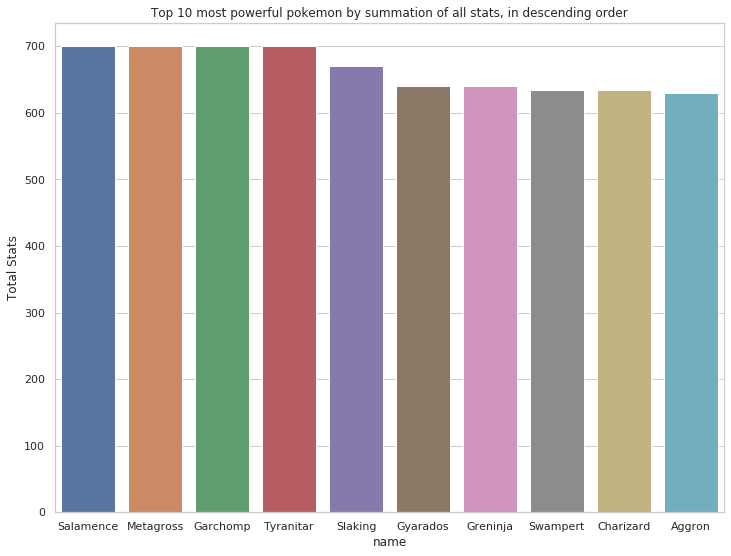

In [18]:
#Let's plot the top ten most powerful pokemon using sns.barplot, setting the figsize to 12, 9 to aid in readibility
sns.set(rc={'figure.figsize':(12,9)})

sns.set(style='whitegrid')

sns.barplot(x="name", y="Total Stats", data=top_ten).set_title('Top 10 most powerful pokemon by summation of all stats, in descending order')

Above, we have the top 10 most powerful pokemon listed by 'Total Stats' in descending order - or, for our purposes, from most powerful of the bunch to least powerful. Salamence, Metagross, Garchomp, and Tyranitar are all tied for first place at 700, while Aggron takes last place, at a little under 650. One can see that the difference between first and last place is very small.

Since we don't know how these pokemon differentiate from one another in terms of individual attribute strengths, it is difficult for one to prioritize which ones to include within one's existing pokemon team. We can take a deeper dive into each pokemon's individual strenghts by greating a multi-plot grid of barplots. 

**Plot 2: Highest Performer For Each Stat - Top 10 Most Powerful Pokemon**

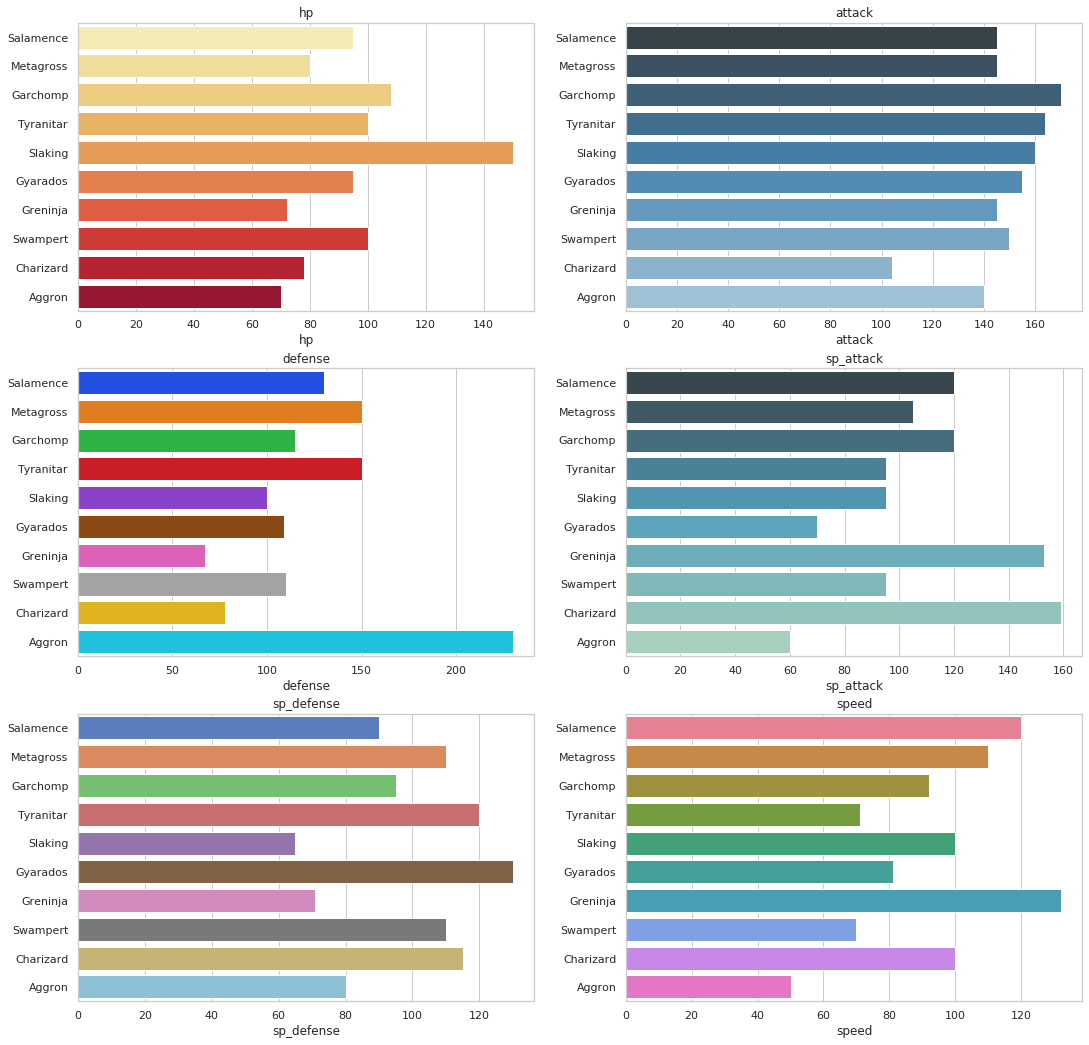

In [19]:
#Let's visualize the individual strengths of each pokemon to get a better idea of where their strengths lie

just_stats = top_ten[['hp','attack','defense','sp_attack','sp_defense','speed', 'name']] 
just_stats.set_index('name', inplace = True)
pokemon_names = just_stats.index.unique().tolist()
i= 1  #increment this variable to distribute subplots across indices
c=0   #increment this variable to distribute color palettes across subplots
palette=['YlOrRd','Blues_d','bright', 'GnBu_d', 'muted', 'husl']
plt.figure(figsize=(18,18))

for stat in just_stats: #Let's create a chart listing the stats for each of the top 10 pokemon
    plt.subplot(3,2,i)
    sns.barplot(x =just_stats[stat], y=pokemon_names,palette = palette[c])
    plt.title(str(stat))
    i=i+1
    c=c+1

After taking a dive into each pokemon's standing by individual attributes, the differences amongst the top ten become more salient. No single pokemon holds the top position in more than one attrbute. The top performers for hp, attack, defense, sp_attack, sp_defense, and speed are Slaking, Garchomp, Aggron, Charizard, Gyrados, and Greninja, respectively. 

For the sake of future exploration, it may be of some interest to view which generations are represented the most amongst the top ten. To accomplish this, we can create another simple barplot. 

**Plot 3: Which generation is represented the most?**

Text(0.5, 1.0, 'Top 10 pokemon - generation')

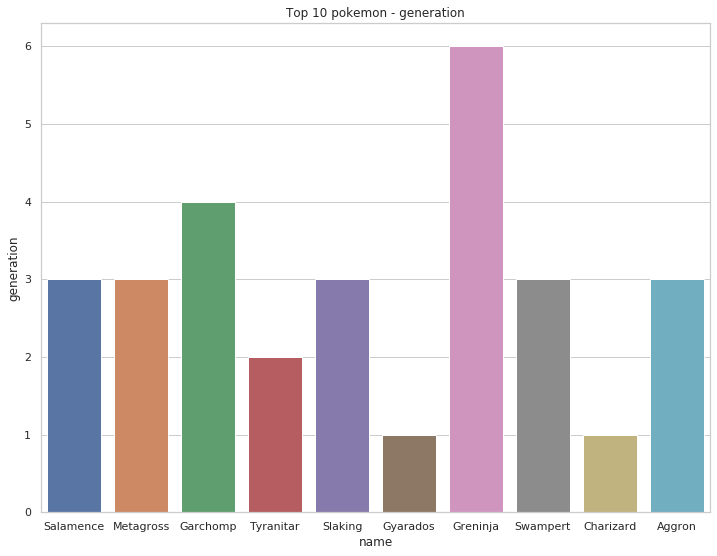

In [20]:
#Let's visualize the generation represenation amongst the top 10

sns.set(rc={'figure.figsize':(12,9)})

sns.set(style='whitegrid')

sns.barplot(x="name", y="generation", data=top_ten).set_title('Top 10 pokemon - generation')

Here, we can see the generational distribution of the top 10 most powerful pokemon. As a clarification, the y-axis displays the generation that each individual pokemon in the top 10 was first introduced. Generation three has the most representation, with five of the top 10, or 50% having been introduced in that generation(Salamence, Metagross, Slaking, Swampert, and Aggron). Two pokemon, or 20%, come from generation one(Gyrados and Charizard), while the remaining three come from generations four, two, and six(Garchomp, Tyranitar, and Greninja, respectively). Interestingly, generation seven is not represented at all amongst the top 10.

**Conclusion**

By using a single visualizaton technique, we were able to answer three distinct and important broad stroke questions about our data - namely: What are the top ten most powerful pokemon, what are the individual strengths of the top ten, and what generation do they come from. In terms of steps for further exploration, by utilizing this approach, it is theoretically possible to take an even deeper dive and determine the top performing pokemon within **each individual generation**. This way, one can quickly determine their ideal pokemon team for whichever pokemon video game title they may be playing at any given point in time.

**Credit where credit is due**

For general procedural guidance, I consulted this exploratory data analysis done by kaggle contributor John Cook, who conducted analyses on a different set of pokemon data. https://www.kaggle.com/mangotreefish/who-is-the-strongest-pokemon/data